len(samples): 5398
len(set(labels)): 46
train_Y
Number 45: 132, Number 2: 94, Number 8: 124, Number 6: 94, Number 40: 96, Number 14: 89, Number 25: 66, Number 27: 71, Number 31: 109, Number 5: 103, Number 41: 110, Number 44: 109, Number 39: 83, Number 29: 120, Number 16: 97, Number 35: 123, Number 38: 121, Number 36: 123, Number 13: 115, Number 30: 123, Number 34: 119, Number 4: 104, Number 21: 64, Number 42: 100, Number 1: 122, Number 0: 107, Number 37: 121, Number 9: 82, Number 19: 61, Number 10: 66, Number 43: 87, Number 7: 95, Number 33: 71, Number 32: 93, Number 26: 118, Number 12: 60, Number 24: 112, Number 17: 94, Number 18: 92, Number 22: 59, Number 3: 104, Number 20: 105, Number 11: 60, Number 15: 45, Number 23: 13, Number 28: 62
test_Y
Number 15: 17, Number 14: 27, Number 31: 27, Number 9: 26, Number 1: 29, Number 5: 38, Number 3: 25, Number 26: 30, Number 30: 31, Number 39: 21, Number 38: 28, Number 13: 34, Number 16: 21, Number 20: 16, Number 43: 21, Number 27: 18, Number 2

Using cache found in /home/mambauser/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 1 0.51s: train loss 2.870420, train acc 0.236, test loss 2.262427, test acc 0.319
Epoch 2 0.50s: train loss 1.779097, train acc 0.453, test loss 1.595802, test acc 0.472
Epoch 3 0.50s: train loss 1.210682, train acc 0.616, test loss 1.412255, test acc 0.560
Epoch 4 0.50s: train loss 0.971796, train acc 0.694, test loss 1.509074, test acc 0.529
Epoch 5 0.77s: train loss 0.708287, train acc 0.780, test loss 1.320562, test acc 0.591
Epoch 6 0.50s: train loss 0.589193, train acc 0.818, test loss 1.170728, test acc 0.640
Epoch 7 0.51s: train loss 0.330868, train acc 0.904, test loss 1.186198, test acc 0.630
Epoch 8 0.49s: train loss 0.186389, train acc 0.949, test loss 1.259843, test acc 0.634
Epoch 9 0.49s: train loss 0.156229, train acc 0.960, test loss 1.212729, test acc 0.648
Epoch 10 0.51s: train loss 0.070510, train acc 0.984, test loss 1.144757, test acc 0.669
Epoch 11 0.50s: train loss 0.056295, train acc 0.985, test loss 1.402080, test acc 0.640
Epoch 12 0.51s: train loss 0.1

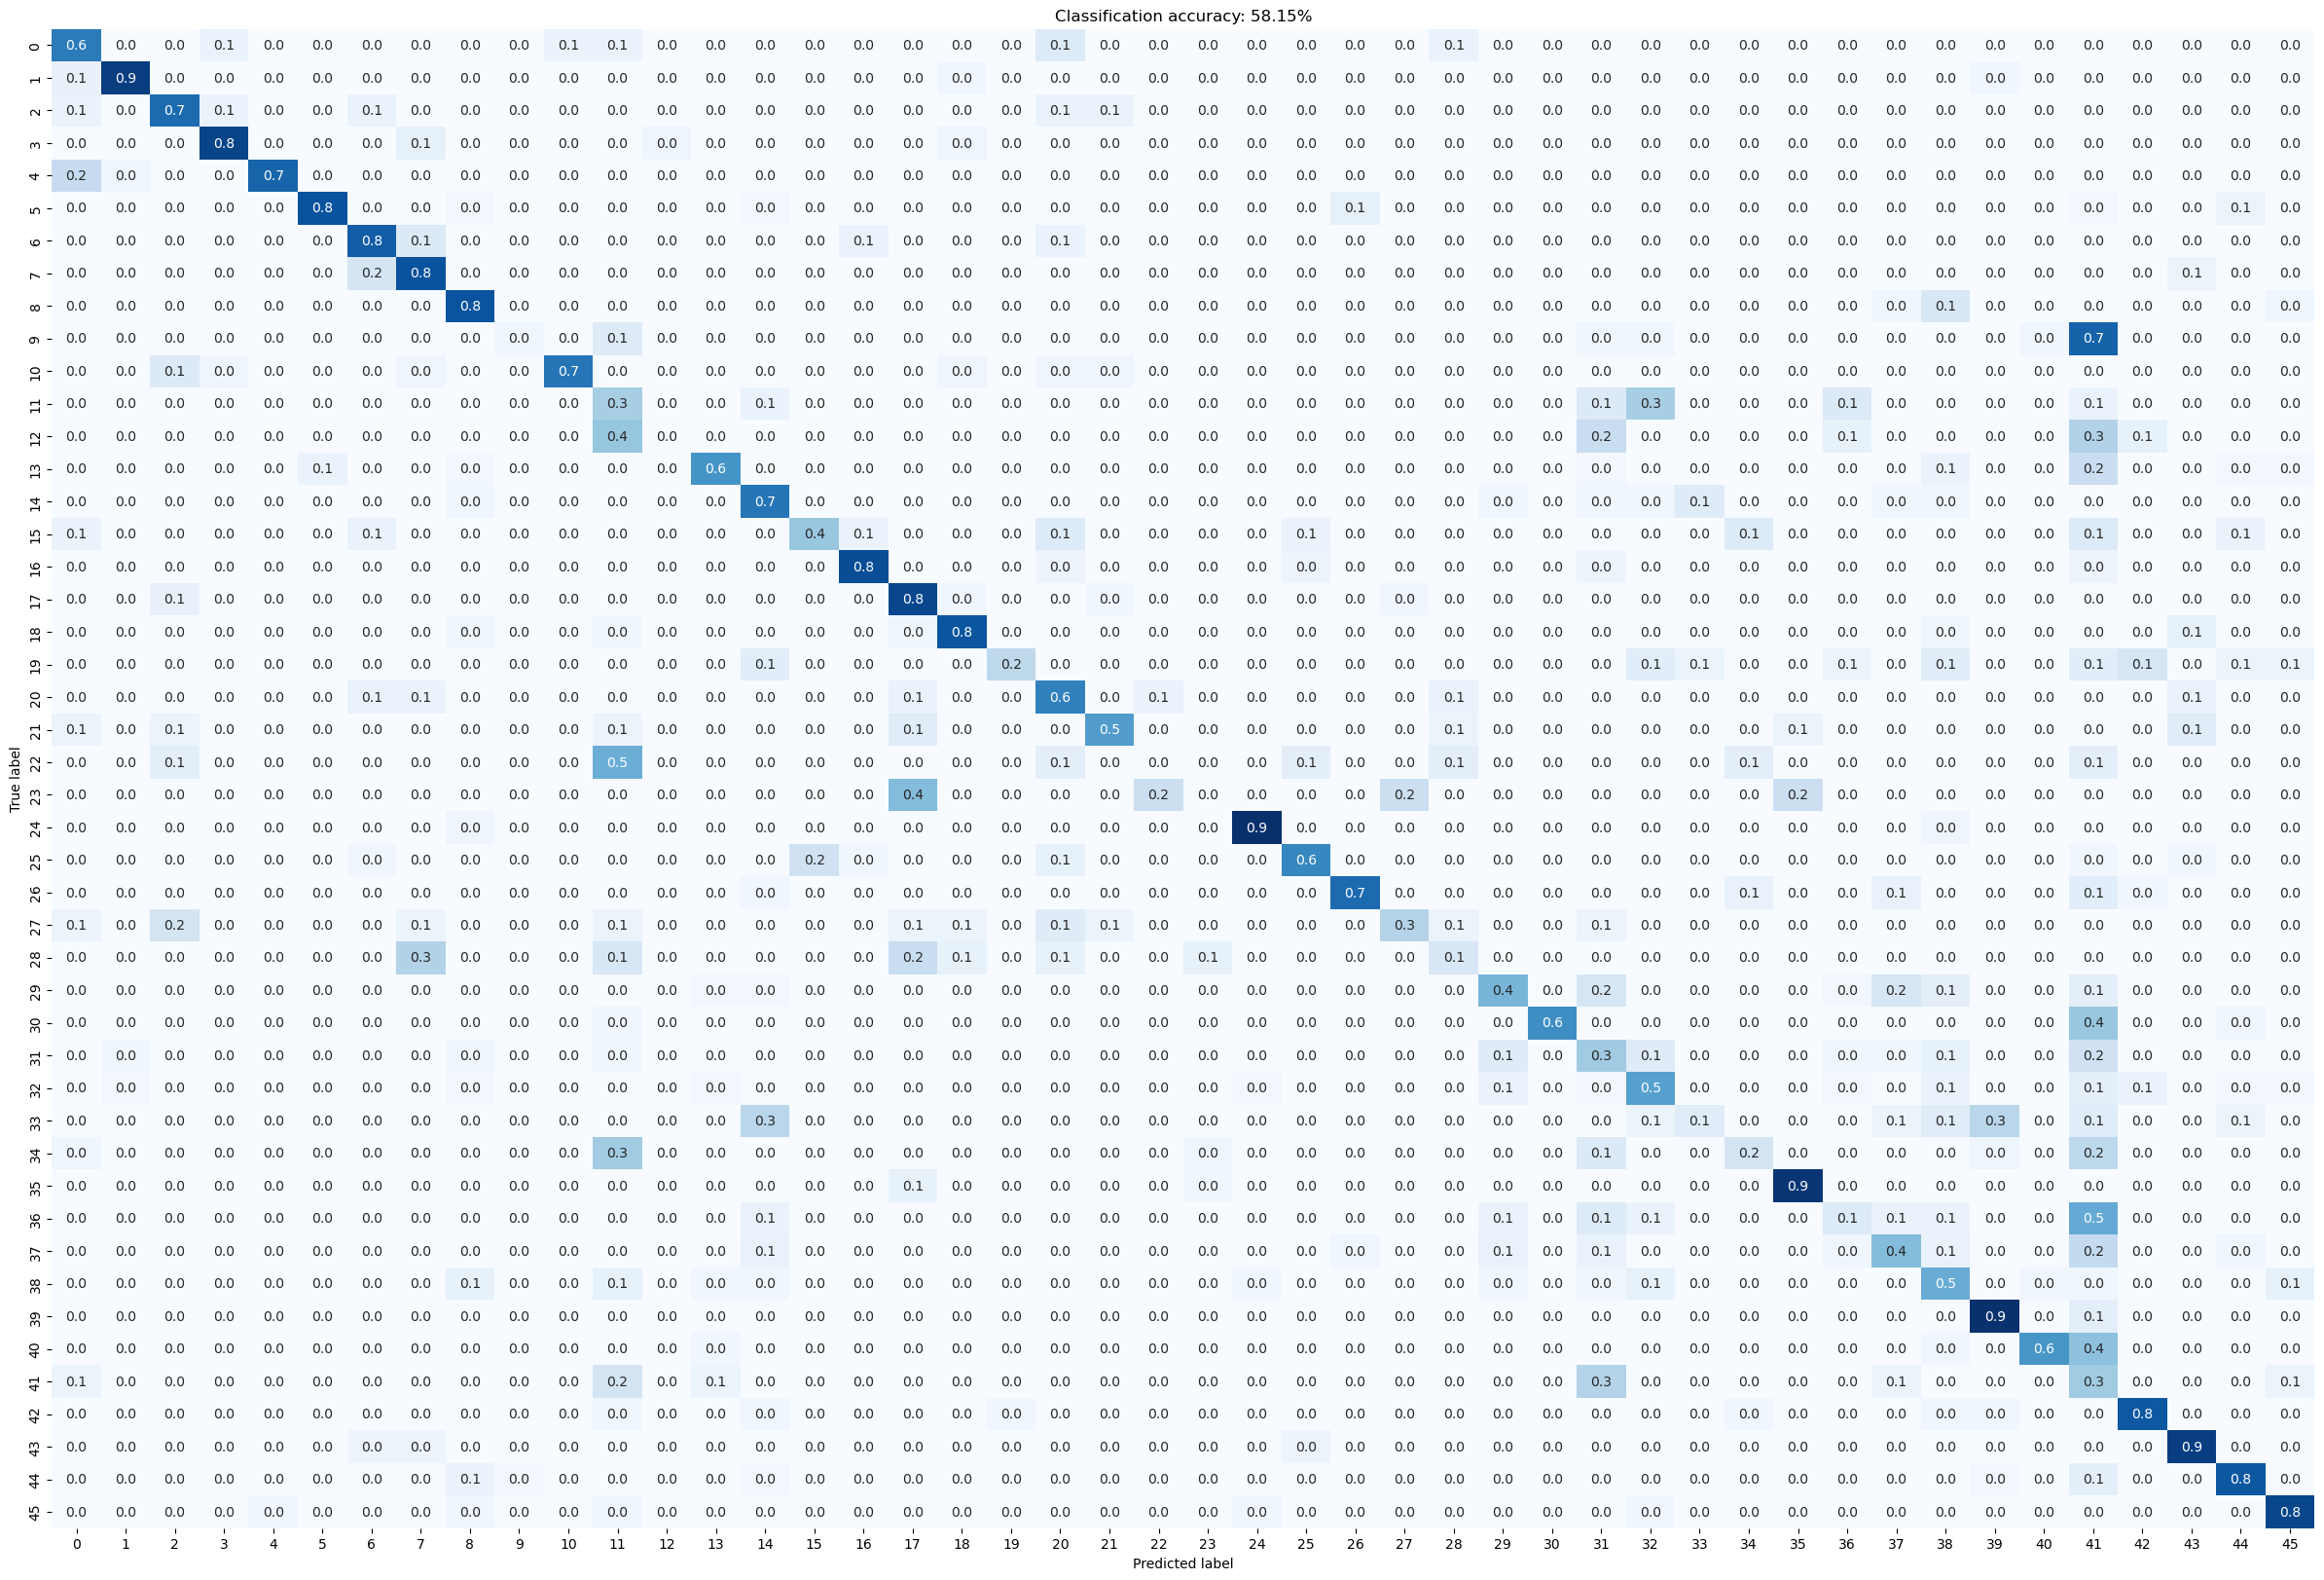

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

from MMClassifyFunc.train import Trainer
from MMClassifyFunc.models import CustomResNet
from MMClassifyFunc.data_preprocess import get_loader_hdf5
from MMClassifyFunc.data_read import get_data_hdf5_wly
from MMClassifyFunc.visualization import visualize_results, visualize_predict

import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

h5_file_path = "/home/mambauser/MMClassify/data/data_processed_noise_mma_new.hdf5"
in_channels = 1

samples, labels = get_data_hdf5_wly(
    h5_file_path=h5_file_path,
    in_channels=in_channels,
    wordIndex=[0, 1],
    # fileIndex=list(range(0,10))+list(range(12,30))+list(range(32,40)),
    # personIndex=list(range(5)),
    # txIndex=list(range(0, 8)),
    useLog=False,
    timeLength=200,
)

print("len(samples): {}".format(len(samples)))
print("len(set(labels)): {}".format(len(set(labels))))

trainloader, testloader = get_loader_hdf5(samples=samples, labels=labels)

# classifier
classifier = CustomResNet(
    in_channels=in_channels,
    num_classes=len(set(labels)),
    weights=models.ResNet18_Weights.DEFAULT,
    model="resnet18",
)

# optimizers
lr = 1e-3
betas = (0.5, 0.99)
optimizer = optim.Adam(classifier.parameters(), lr=lr, betas=betas)
criterion = nn.CrossEntropyLoss()

# train model
NUM_INPUTS = 1
epochs = 50

trainer = Trainer(
    num_inputs=NUM_INPUTS,
    classifier=classifier,
    optimizer=optimizer,
    criterion=criterion,
    print_every=1,
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    use_cuda=torch.cuda.is_available(),
    use_scheduler=False,
)

trainer.train(trainloader=trainloader, testloader=testloader, epochs=epochs)

visualize_results(trainer=trainer)

In [2]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import models
# from tqdm import tqdm

# from MMClassifyFunc.train import Trainer
# from MMClassifyFunc.models import CustomResNet
# from MMClassifyFunc.data_preprocess import get_loader_hdf5, get_loader_all_hdf5
# from MMClassifyFunc.data_read import get_data_hdf5_wly
# from MMClassifyFunc.visualization import visualize_results, visualize_predict


# h5_file_path = "/home/mambauser/MMClassify/data/data_processed_noise_mma_new.hdf5"
# in_channels = 1

# samples, labels = get_data_hdf5_wly(
#     h5_file_path=h5_file_path,
#     in_channels=in_channels,
#     wordIndex=[0],
#     # fileIndex=list(range(0,10))+list(range(12,30))+list(range(32,40)),
#     # personIndex=[0],
#     # txIndex=[8,9],
#     useLog=True,
#     timeLength=200,
# )

# print("len(samples): {}".format(len(samples)))
# print("len(set(labels)): {}".format(len(set(labels))))

# # Create dataset and dataloader
# dataloader = get_loader_all_hdf5(samples, labels)

# # classifier
# trainer.classifier.eval()

# # Device setup
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# # classifier.to(device)
# trainer.classifier.to(device)

# # Prepare for evaluation
# all_labels = []
# all_preds = []

# with torch.no_grad():
#     for images, labels in tqdm(dataloader, desc="Processing batches"):
#         images, labels = images.to(device), labels.to(device)
#         outputs = trainer.classifier(images)
#         _, predicted = torch.max(outputs.data, 1)

#         all_labels.extend(labels.cpu().numpy())
#         all_preds.extend(predicted.cpu().numpy())

# visualize_predict(all_labels, all_preds)